**Vamos experimentar agora o algoritmo Decision Tree?**

In [ ]:
!pip -q install yellowbrick

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
import pickle
with open('/content/sample_data/iris.pkl', 'rb') as f:
  X_treino, X_teste, y_treino, y_teste = pickle.load(f)

**Importando a biblioteca de ajuste de hiperparâmetros**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {
    'criterion':  ['gini', 'entropy'],
    'n_estimators':  [50, 70, 80, 90, 100, 120, 140],
    'max_depth':  [None, 2, 4, 6, 8, 10],
    'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
}

modelo = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=params,
    cv=10,
    n_jobs=5,
    verbose=1,
)

In [ ]:
modelo.fit(X_treino, y_treino)
print(modelo.best_params_)
print(modelo.best_score_)

Fitting 10 folds for each of 420 candidates, totalling 4200 fits
{'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 50}
0.9583333333333333


**Agora precisamos rodar a árvore com os hiperparâmetros obtidos**

**Para isso, pegue os melhores valores acima e rode o modelo com estes hiperparâmetros**

In [ ]:
#coloque aqui os melhores hiperparâmetros que o gridsearch achou aqui em cima...
modelo= RandomForestClassifier(max_depth=2, n_estimators= 90, criterion='gini', max_features=0.6)
modelo.fit(X_treino, y_treino)

RandomForestClassifier(max_depth=2, max_features=0.6, n_estimators=90)



> **Vamos testar o modelo?**



In [ ]:

previsoes = modelo.predict(X_teste)

In [ ]:
previsoes

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)



> **Será se o modelo acertou?**



In [ ]:
y_teste

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_teste,previsoes)

0.9666666666666667

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste, previsoes)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  1,  5]])

0.9666666666666667

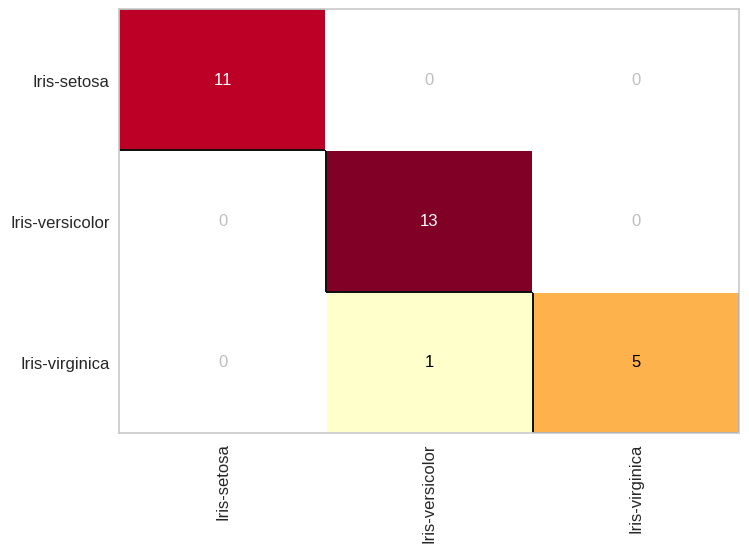

In [ ]:
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [ ]:
print(classification_report(y_teste, previsoes))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.83      0.91         6

       accuracy                           0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [ ]:
modelo.feature_importances_

array([0.13453621, 0.01773457, 0.34773711, 0.49999211])

In [ ]:
import numpy as
import pandas as pd
fig, ax = plt.subplots()
modelo.feature_importances_.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

SyntaxError: ignored